In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import sknetwork
import community as community_louvain
from functions import *
import scipy as sp
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sknetwork.clustering import get_modularity
from collections import defaultdict
from community import community_louvain
import community.community_louvain as community_louvain

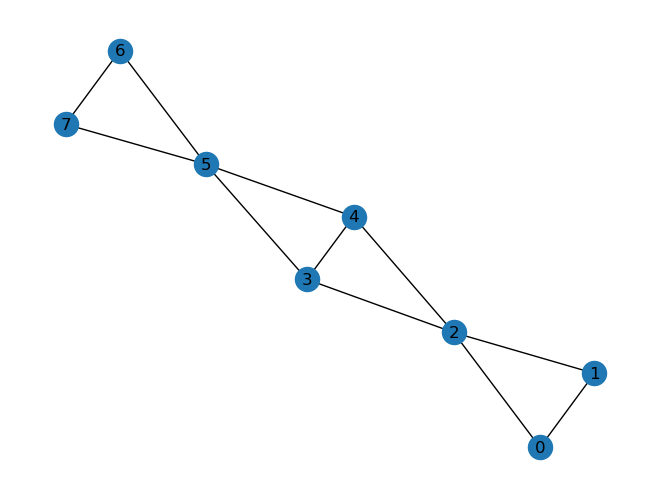

In [2]:
# G = nx.Graph()

G = nx.Graph([(0, 1), (1, 2), (2, 0),
              (2, 3), (3, 4), (2, 4),
              (3, 5), (4, 5),
              (5, 6), (5, 7), (6, 7)])

# G = nx.Graph([(0, 1), (1, 2), (2, 0),
#               (2, 3), (1, 3)])

nx.draw(G, with_labels=True)

In [3]:
triangle_list = pd.DataFrame(np.array([[2, 3, 4], [3, 4, 5]]),
                   columns=['node_1', 'node_2', 'node_3'])

# triangle_list = pd.DataFrame(np.array([[0, 1, 2]]),
#                     columns=['node_1', 'node_2', 'node_3'])

triangle_list

,node_1,node_2,node_3
0,2,3,4
1,3,4,5


In [4]:
B1 = generate_B1ca(G)
B2 = generate_B2ca_cc(G,triangle_list)

V = np.vstack((np.identity(len(G.edges)),-np.identity(len(G.edges))))

A_l_hat = generate_A_l_hat(B1,V)
A_u_hat = generate_A_u_hat(B2,V)
A_s_hat = generate_A_s_hat(B1,B2)
A_rw_hat = generate_A_rw_hat(A_s_hat, A_l_hat,A_u_hat)

#check the condition for Therorem 2:
if np.sum(A_rw_hat) < np.amax(np.sum(A_rw_hat,axis = 1)):
    print("assumption violation")

In [12]:
G_dual = nx.from_numpy_matrix(A_rw_hat)
louvain_e = community_louvain.best_partition(G_dual)
louvain_e

{0: 1,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 0,
 10: 0,
 11: 1,
 12: 1,
 13: 2,
 14: 3,
 15: 4,
 16: 5,
 17: 6,
 18: 7,
 19: 8,
 20: 0,
 21: 0}

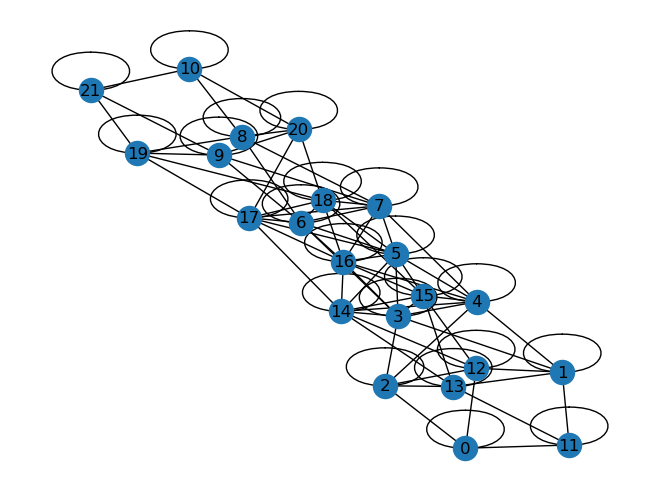

In [7]:
# nx.draw(G_dual, with_labels=True)